In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [122]:
train_data=pd.read_csv("./train_data.csv")
test_data=pd.read_csv("./test_data.csv")
train_data.head()

,Unnamed: 0,CountryCode_x,Amount,Value,PricingStrategy,vd,hour,day,month,year,...,ProviderId_woe,Value_woe,PricingStrategy_woe,ProductId_woe,month_woe,year_woe,ProductCategory_woe,Amount_woe,day_woe,ChannelId_woe
0,0,256.0,1000.0,1000.00000,2.0,0,2,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.817006,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
1,1,256.0,3679.0,20.00000,2.0,0,2,15,11,2018,...,-2.736920,-2.217519,0.094351,-2.812009,0.078716,-0.245002,0.572204,-2.043187,0.015506,-2.135528
2,4,256.0,-644.0,644.00000,2.0,0,3,15,11,2018,...,-2.736920,-2.217519,0.094351,-2.812009,0.078716,-0.245002,0.572204,-2.043187,0.015506,-2.135528
3,5,256.0,3679.0,9900.64041,2.0,0,3,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.351665,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
4,8,256.0,3679.0,500.00000,2.0,0,4,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.817006,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076


In [123]:
test_data.head()

,Unnamed: 0,CountryCode_x,Amount,Value,PricingStrategy,vd,hour,day,month,year,...,ProviderId_woe,Value_woe,PricingStrategy_woe,ProductId_woe,month_woe,year_woe,ProductCategory_woe,Amount_woe,day_woe,ChannelId_woe
0,2,256.0,500.0,500.00000,2.0,0,2,15,11,2018,...,-2.736920,-2.217519,0.094351,-1.817006,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
1,3,256.0,20000.0,9900.64041,2.0,0,3,15,11,2018,...,1.937469,-2.217519,0.094351,1.562838,0.078716,-0.245002,0.572204,-2.043187,0.015506,0.454076
2,6,256.0,10000.0,10000.00000,2.0,0,3,15,11,2018,...,0.782364,-2.217519,0.094351,-1.351665,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
3,7,256.0,-500.0,9900.64041,2.0,0,3,15,11,2018,...,-2.736920,-2.217519,0.094351,-2.812009,0.078716,-0.245002,0.572204,-2.043187,0.015506,-2.135528
4,10,256.0,600.0,890.00000,2.0,0,4,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.351665,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076


In [124]:
test_data.dtypes

Unnamed: 0                  int64
CountryCode_x             float64
Amount                    float64
Value                     float64
PricingStrategy           float64
vd                          int64
hour                        int64
day                         int64
month                       int64
year                        int64
TransactionStartTime_y     object
CountryCode_y             float64
hour_woe                  float64
ProviderId_woe            float64
Value_woe                 float64
PricingStrategy_woe       float64
ProductId_woe             float64
month_woe                 float64
year_woe                  float64
ProductCategory_woe       float64
Amount_woe                float64
day_woe                   float64
ChannelId_woe             float64
dtype: object

In [125]:
train_data.drop(columns=["TransactionStartTime_y"],inplace=True)
test_data.drop(columns=["TransactionStartTime_y"],inplace=True)


In [126]:
train_data.head()

,Unnamed: 0,CountryCode_x,Amount,Value,PricingStrategy,vd,hour,day,month,year,...,ProviderId_woe,Value_woe,PricingStrategy_woe,ProductId_woe,month_woe,year_woe,ProductCategory_woe,Amount_woe,day_woe,ChannelId_woe
0,0,256.0,1000.0,1000.00000,2.0,0,2,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.817006,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
1,1,256.0,3679.0,20.00000,2.0,0,2,15,11,2018,...,-2.736920,-2.217519,0.094351,-2.812009,0.078716,-0.245002,0.572204,-2.043187,0.015506,-2.135528
2,4,256.0,-644.0,644.00000,2.0,0,3,15,11,2018,...,-2.736920,-2.217519,0.094351,-2.812009,0.078716,-0.245002,0.572204,-2.043187,0.015506,-2.135528
3,5,256.0,3679.0,9900.64041,2.0,0,3,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.351665,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076
4,8,256.0,3679.0,500.00000,2.0,0,4,15,11,2018,...,-3.136976,-2.217519,0.094351,-1.817006,0.078716,-0.245002,-1.655589,-2.043187,0.015506,0.454076


In [146]:
train_data["vd"].value_counts()

vd
0    66828
1      135
Name: count, dtype: int64

In [153]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
y_train = train_data.loc[:,'vd']
X_train = train_data.loc[:,train_data.columns != 'vd']
y_test = test_data.loc[:,'vd']
X_test = test_data.loc[:,train_data.columns != 'vd']
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [152]:
print(train_data['vd'].value_counts())

vd
0    66828
1      135
Name: count, dtype: int64


In [148]:
from sklearn.linear_model import LogisticRegression

# Specify the solver as 'liblinear' to use L1 penalty
lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear')
lr.fit(X_train, y_train)

# Print the coefficients
print(lr.coef_)

[[ 1.25615258e-05 -6.06698959e-03  1.67076179e-07  4.10174162e-08
  -4.46539645e-02  0.00000000e+00  1.28718788e-02 -8.27029418e-03
  -1.60946542e-03 -7.87226969e-03  7.83782605e-01  6.60839396e-01
   9.93296322e-01  0.00000000e+00  4.29372502e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.95687802e-01  1.24669986e-01
  -5.40502506e-02]]


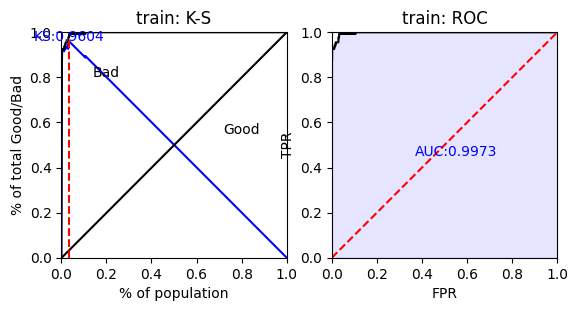

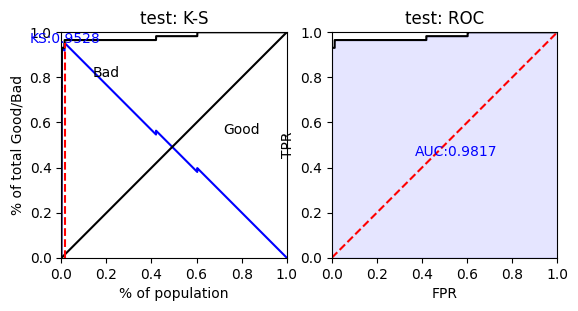

In [130]:
import scorecardpy as sc
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

predictions = lr.predict(X_test)

print('Accuracy')
print(accuracy_score(y_test, predictions))
print('AUC Score')
print(roc_auc_score(y_test, predictions))

Accuracy
0.9991637339280114
AUC Score
0.9221519307383075


In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.77      0.84      0.80        58

    accuracy                           1.00     28699
   macro avg       0.88      0.92      0.90     28699
weighted avg       1.00      1.00      1.00     28699



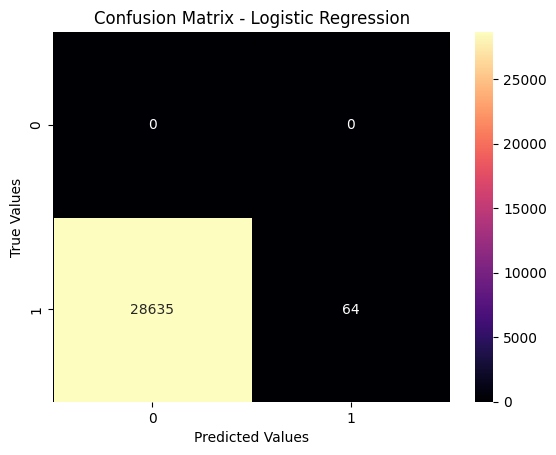

In [143]:
import seaborn as sns
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Logistic Regression');

In [150]:
import numpy as np

# Check unique values in y_train
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([66828,   135], dtype=int64))


In [151]:
y_train = (y_train >= 0).astype(int)
y_test = (y_test >= 0).astype(int)

In [154]:


# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
from sklearn.metrics import accuracy_score

# Predict labels for X_test
y_pred = model.predict(X_test)

# Calculate the accuracy by comparing the predicted labels (y_pred) with true labels (y_test)
accuracy_sc = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy_sc * 100))


Accuracy: 99.18%


In [156]:
 
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[28407   234]
 [    2    56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     28641
           1       0.19      0.97      0.32        58

    accuracy                           0.99     28699
   macro avg       0.60      0.98      0.66     28699
weighted avg       1.00      0.99      0.99     28699



In [157]:
regression = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the model on the training data
regression.fit(X_resampled, y_resampled)



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that oob_score is available
if regression.oob_score:
    oob_score = regression.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')
else:
    print("OOB Score not available. Ensure oob_score=True in the model.")

# Making predictions on the test set
predictions = regression.predict(X_test)

# Evaluating the model with Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.9779463182092534
Mean Squared Error: 0.00041534548242099027
R-squared: 0.7940665720350258


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


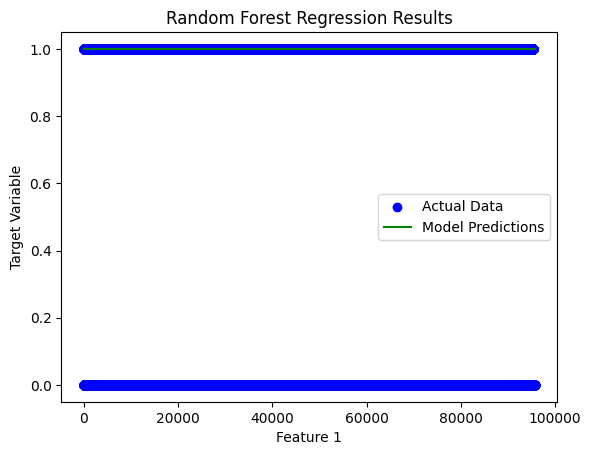

In [160]:
# Generate grid for the first feature
X_grid = np.arange(min(X_resampled.iloc[:, 0]), max(X_resampled.iloc[:, 0]), 0.01)  # Grid for the first feature
X_grid = X_grid.reshape(-1, 1)

# Repeat mean values of other features to match the shape
mean_values = np.mean(X_resampled.iloc[:, 1:], axis=0)  # Mean of other features
X_grid_full = np.hstack([X_grid, np.tile(mean_values, (X_grid.shape[0], 1))])

# Predict on the complete feature set
y_pred = regression.predict(X_grid_full)

# Plot
plt.scatter(X_resampled.iloc[:, 0], y_resampled, color='blue', label='Actual Data')
plt.plot(X_grid[:, 0], y_pred, color='green', label='Model Predictions')
plt.title("Random Forest Regression Results")
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.legend()
plt.show()


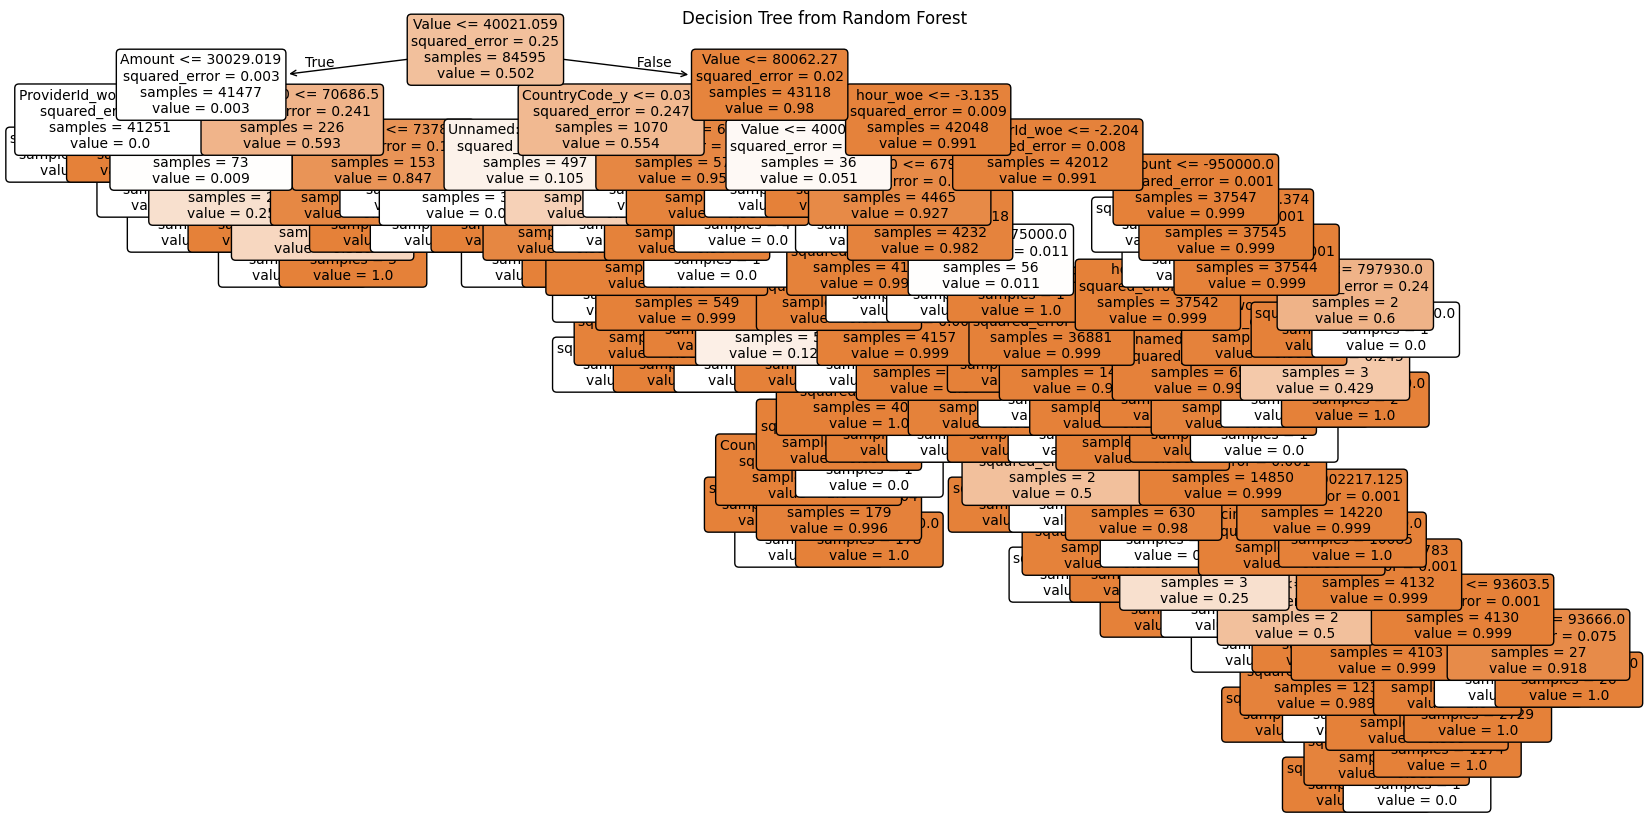

In [162]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regression.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=train_data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [164]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm.fit(X_resampled, y_resampled)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0016067131796281033


In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [169]:
# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_resampled, y_resampled)
# print(clf.best_params_)

In [170]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [171]:
clf_log = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [172]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(penalty='l2', solver='lbfgs', random_state=0)


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid with fewer options
param_grid = {
    'n_estimators': [50, 100],  # Instead of a larger range
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
}

# Create the model
rf_model = RandomForestClassifier()

# Initialize grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1)

# Fit the grid search (this will be faster with a reduced grid)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [174]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9993031116066762


In [175]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly choose from 50 to 200
    'max_depth': randint(1, 10),        # Randomly choose from 1 to 10
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Set up Randomized Search
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, 
                                   scoring='accuracy', n_iter=50, cv=5, verbose=1, n_jobs=-1)

# Fit random search
random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 68, 'subsample': 1.0}
Best Score: nan


In [176]:
best_gbm = grid_search.best_estimator_
test_accuracy = best_gbm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9993031116066762


In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Function to calculate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]  # For ROC-AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)

# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(model, X_test, y_test)


Logistic Regression:
Accuracy: 0.9918
Precision: 0.1931
Recall: 0.9655
F1 Score: 0.3218
ROC-AUC: 0.9872
------------------------------


In [183]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming your train data is already loaded and preprocessed
# Train the model
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Only for classification models

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Evaluate the Gradient Boosting Machine (GBM) model
print("Gradient Boosting Machine (GBM):")
evaluate_model(gbm, X_test, y_test)


Gradient Boosting Machine (GBM):
Accuracy: 0.9997
Precision: 0.9000
Recall: 0.9310
F1 Score: 0.9153
ROC-AUC: 0.9760


In [179]:
from sklearn.ensemble import RandomForestClassifier

# Create a classification model
classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification_model(model, X_test, y_test):
    # Predict the class labels
    y_pred = model.predict(X_test)
    # Predict the probabilities (for ROC-AUC)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


In [180]:
# Fit the classifier model
classification_model.fit(X_train, y_train)

# Evaluate the model on the test set
print("Random Forest Classification:")
evaluate_classification_model(classification_model, X_test, y_test)


Random Forest Classification:
Accuracy: 0.9995
Precision: 0.8644
Recall: 0.8793
F1 Score: 0.8718
ROC-AUC: 0.9826


In [186]:
import joblib

# Save the model to a file
joblib.dump(random_search, 'gbm_model.pkl')


['gbm_model.pkl']

In [187]:

loaded_model = joblib.load('gbm_model.pkl')
predictions = loaded_model.predict(X_test)
print(predictions)

[-2.17504135e-05  3.04690896e-04 -2.17504135e-05 ...  4.05611821e-04
  4.05611821e-04  7.91705117e-05]


In [188]:
train_data.dtypes

Unnamed: 0               int64
CountryCode_x          float64
Amount                 float64
Value                  float64
PricingStrategy        float64
vd                       int64
hour                     int64
day                      int64
month                    int64
year                     int64
CountryCode_y          float64
hour_woe               float64
ProviderId_woe         float64
Value_woe              float64
PricingStrategy_woe    float64
ProductId_woe          float64
month_woe              float64
year_woe               float64
ProductCategory_woe    float64
Amount_woe             float64
day_woe                float64
ChannelId_woe          float64
dtype: object